<a href="https://colab.research.google.com/github/YianKim/Complaints-NLP-Visualization-2021/blob/main/5_%EC%8B%9C%EA%B0%81%ED%99%94(djswl).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (8,307 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 155219 files and d

In [ ]:
import numpy as np 
import pandas as pd 

In [ ]:
# 시각화 모듈 임포트
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from matplotlib import font_manager, rc
import matplotlib.font_manager as fm  # 폰트 관련 용도

# colab 내 그래프를 바로 그리기 위한 설정
%matplotlib inline

# unicode minus를 사용하지 않기 위한 설정 (minus 깨짐현상 방지)
plt.rcParams['axes.unicode_minus'] = False

# font 적용
plt.rc('font', family = 'NanumBarunGothic')

# ggplot 으로 그래프 스타일 설정
plt.style.use('ggplot')

# 레티나 설정 : 글자가 흐릿하게 보이는 현상 방지
%config InlineBackend.figure_format = 'retina'

In [ ]:
sys_font=fm.findSystemFonts()
print(f"sys_font number: {len(sys_font)}")
print(sys_font)

nanum_font = [f for f in sys_font if 'Nanum' in f]
print(f"nanum_font number: {len(nanum_font)}")

sys_font number: 27
['/usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareB.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareR.ttf', '/usr/share/fonts/truetype/liberation/LiberationMono-Regular.ttf', '/usr/share/fonts/truetype/liberation/LiberationSans-Regular.ttf', '/usr/share/fonts/truetype/liberation/LiberationMono-Italic.ttf', '/usr/share/fonts/truetype/liberation/LiberationMono-Bold.ttf', '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Bold.ttf', '/usr/share/fonts/truetype/liberation/LiberationSans-Italic.ttf', '/usr/share/fonts/truetype/humor-sans/Humor-Sans.ttf', '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-BoldItalic.ttf', '/usr/share/fonts/truetype/liberation/LiberationSans-Bold.ttf', '/usr/share/fonts/truetype/nanum/NanumGothic.ttf', '/usr/share/fonts/truetype/liberation/LiberationSerif-Bold.

In [ ]:
data = pd.read_csv('/content/drive/Shareddrives/2021민원/데이터/data_topictwit.csv')
data.drop(['Unnamed: 0'], axis = 1, inplace = True)
data.head()

,제목,질문내용,답변내용,최상위기관명,분야명,담당부서명,연,월,일,오전오후,시간,토픽
0,의성군 귀농귀촌 정책 문의,의성군 귀농귀촌 정책 문의,우선 저희 의성군으로 귀농귀촌하고자 하셔서 감사합니다 귀농귀촌 지원정책을 설명하기에...,경상북도 의성군,행정/자치/안전,농업기술센터,2021,08,27,오후,3:31:44,1
1,불법주정차 신고합니다,대 불법주정차 과태료 부과 대상,귀하의 가정에 평안함과 행복을 기원합니다 귀하께서 국민신문고로 요청하신 사항에 대하...,경상북도 의성군,행정/자치/안전,일자리창출과,2021,08,27,오후,1:49:33,2
2,아동수당 지급 대상,아동수당 지급 대상이 궁금합니다,안녕하십니까 귀하께서 문의하신 질의에 대한 답변을 다음과 같이 알려드립니다 귀하의 ...,경상북도 의성군,행정/자치/안전,복지과,2021,08,27,오후,4:19:51,4
3,광견병 예방 접종 관련 문의,광견병 예방접종 질문사항 의성군에서 광견병 접종 예방 계획이 있으신지요 있다면 기간...,안녕하십니까 귀하께서 국민신문고를 통해 신청하신 민원에 대한 검토 결과를 다음과 같...,경상북도 의성군,행정/자치/안전,농축산과,2021,08,27,오후,4:18:09,6
4,아동수당 지급 금액과 지급 일자,아동수당 지급 금액과 지급 일자가 궁금합니다,안녕하십니까 귀하께서 문의하신 질의에 대한 답변을 다음과 같이 알려드립니다 귀하의 ...,경상북도 의성군,행정/자치/안전,복지과,2021,08,27,오후,4:24:24,4


In [ ]:
data['topic'] = data['토픽'].apply(lambda x: 1 if x == 6 else (2 if x == 0 else (3 if x == 4 else (4 if x == 3 else (5 if x == 1 else (6 if x == 2 else (7)))))))
data.head()

,제목,질문내용,답변내용,최상위기관명,분야명,담당부서명,연,월,일,오전오후,시간,토픽,topic
0,의성군 귀농귀촌 정책 문의,의성군 귀농귀촌 정책 문의,우선 저희 의성군으로 귀농귀촌하고자 하셔서 감사합니다 귀농귀촌 지원정책을 설명하기에...,경상북도 의성군,행정/자치/안전,농업기술센터,2021,08,27,오후,3:31:44,1,5
1,불법주정차 신고합니다,대 불법주정차 과태료 부과 대상,귀하의 가정에 평안함과 행복을 기원합니다 귀하께서 국민신문고로 요청하신 사항에 대하...,경상북도 의성군,행정/자치/안전,일자리창출과,2021,08,27,오후,1:49:33,2,6
2,아동수당 지급 대상,아동수당 지급 대상이 궁금합니다,안녕하십니까 귀하께서 문의하신 질의에 대한 답변을 다음과 같이 알려드립니다 귀하의 ...,경상북도 의성군,행정/자치/안전,복지과,2021,08,27,오후,4:19:51,4,3
3,광견병 예방 접종 관련 문의,광견병 예방접종 질문사항 의성군에서 광견병 접종 예방 계획이 있으신지요 있다면 기간...,안녕하십니까 귀하께서 국민신문고를 통해 신청하신 민원에 대한 검토 결과를 다음과 같...,경상북도 의성군,행정/자치/안전,농축산과,2021,08,27,오후,4:18:09,6,1
4,아동수당 지급 금액과 지급 일자,아동수당 지급 금액과 지급 일자가 궁금합니다,안녕하십니까 귀하께서 문의하신 질의에 대한 답변을 다음과 같이 알려드립니다 귀하의 ...,경상북도 의성군,행정/자치/안전,복지과,2021,08,27,오후,4:24:24,4,3


In [ ]:
data['토픽'].value_counts()

6    10763
4     9624
1     8704
3     7573
0     7473
5     7017
2     6095
Name: 토픽, dtype: int64

In [ ]:
data['topic'].value_counts()

1    10763
3     9624
5     8704
4     7573
2     7473
7     7017
6     6095
Name: topic, dtype: int64

In [ ]:
topic_0 = data[data['토픽'] == 0]
topic_0.head(100)

,제목,질문내용,답변내용,최상위기관명,분야명,담당부서명,연,월,일,오전오후,시간,토픽
47,부서별 직통번호 공개 요청,부서별 직통번호 공개 요청,안녕하십니까 귀하께서 신청하신 민원에 대한 검토 결과를 다음과 같이 알려드립니다 현...,전라북도 순창군,행정/자치/안전,행정과,2021,07,21,오전,11:25:45,0
137,신고에 의한 입목 벌채관련,안녕하세요 벌채관련 문의드립니다 가 나무가 자라고 있는 지목상 전 이고 천제곱미터 ...,o 안녕하십니까 봉화군 산림녹지과입니다 소관부서와 관련된 사항에 대하여 문의하여 주...,경상북도 봉화군,행정/자치/안전,산림녹지과,2019,08,01,오후,3:22:16,0
146,식품제조가공업 영업등록 대상 여부,채소류를 선별 세척 절단 후 살균처리 후 헹굼 공정을 거친 후 휴게음식점에서 원재료...,안녕하십니까 먼저 우리 군 발전을 위해 노력하여 주신 귀하께 감사의 말씀을 드립니다...,경상북도 봉화군,행정/자치/안전,종합민원과,2020,07,08,오후,5:34:18,0
161,농산물 직거래 관련 질의,농산물 직거래가 무엇인지 궁금합니다,안녕하십니까 봉화군 농업기술센터 유통특작과 차산업팀입니다 농산물 직거래에 관심을 가...,경상북도 봉화군,행정/자치/안전,유통특작과,2021,05,04,오후,3:36:32,0
200,광양노인복지관 분관 운영안내,광양노인복지관 분관 운영계획은,광양실버주택 내 층에 광양노인복지관 분관이 운영됩니다 입주 어르신과 지역 어르신들을...,전라남도 광양시,행정/자치/안전,민원지적과,2021,04,23,오후,3:52:09,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1852,선거관리위원회,선거관리위원회의 업무에 대해 알고 싶습니다,선거관리위원회는 년 월 일 선거의 공정한 관리를 위해 창설되었는데요 국회정부법원헌법...,서울특별시 강동구,행정/자치/안전,감사담당관,2021,07,30,오후,4:14:26,0
1855,선거의 종류,선거의 종류에 대해 알려주세요,아래와 같이 공직선거의 종류에 대해 안내해드립니다 대통령 선거 임기 년 대통령은 중...,서울특별시 강동구,행정/자치/안전,감사담당관,2021,07,30,오후,4:22:14,0
1884,용도변경시 입주자의 동의를 받는 주체,공동주택관리법 시행령 별표에 따라 운동시설의 을 입주자 동의를 받아 주차장으로 용도...,귀하의 건강과 행복을 기원 드리며 귀하께서 경기도에 접수하여 우리시로 이송된 국민신...,경기도 안양시,행정/자치/안전,시민봉사과,2021,06,10,오전,11:22:06,0
1899,경기도 안양시 노인맞춤돌봄서비스 수행기관 질의,경기도 안양시 노인맞춤돌봄서비스 수행기관 질의 경기도 안양시 노인맞춤 돌봄수행기관 ...,시정에 관심을 가져주셔서 감사드리며 귀하께서 문의하신 내용 신청번호 aa 숫자 비식...,경기도 안양시,행정/자치/안전,시민봉사과,2021,06,10,오후,1:36:09,0


In [ ]:
topic_1 = data[data['토픽'] == 1]
topic_1.head(50)

,제목,질문내용,답변내용,최상위기관명,분야명,담당부서명,연,월,일,오전오후,시간,토픽
0,의성군 귀농귀촌 정책 문의,의성군 귀농귀촌 정책 문의,우선 저희 의성군으로 귀농귀촌하고자 하셔서 감사합니다 귀농귀촌 지원정책을 설명하기에...,경상북도 의성군,행정/자치/안전,농업기술센터,2021,08,27,오후,3:31:44,1
5,공공일자리 사업에 참여하고자 합니다,공공일자리 사업에 참여하고자 합니다 공공일자리 사업은 어떻게 시행되나요,귀하께서 문의하신 공공일자리 사업의 주된 내용은 다음과 같습니다 사업개요 사업목적 ...,경상북도 의성군,행정/자치/안전,일자리창출과,2021,08,27,오후,4:50:31,1
9,토지를 합병하려고 하는데 신청절차 및 조건이 어떻게 되나요,토지를 합병하려고 하는데 신청절차 및 조건이 어떻게 되나요,토지를 합병하고자 하는 토지소유자는 공간정보의 구축 및 관리 등에 관한 법률 제조제...,경상북도 의성군,행정/자치/안전,민원과,2021,08,29,오후,4:25:25,1
13,토지 측량방법과 절차,저희 어머니께서 oo리 번지 토지를 계약하셨는데 해당주소에 측량을 원합니다 방법과 ...,안녕하십니까 귀하께서 국민신문고를 통해 신청하신 민원 신청번호 ooo ooo ooo...,경상북도 의성군,행정/자치/안전,민원과,2021,08,30,오전,9:04:26,1
14,개별공시지가 조회 방법,제가 소유하고 있는 oo면 oo리 ooo번지의 개별공시지가를 알고싶습니다 어디서 확...,안녕하십니까 귀하께서 국민신문고를 통해 신청하신 민원 신청번호 ooo ooo ooo...,경상북도 의성군,행정/자치/안전,민원과,2021,08,30,오전,10:39:26,1
19,노후경유차 조기폐차지원사업 안내 중 신차 보조금에 대한 문의,아버지가 의성군에 살고 계시는데 이번에 노후경유차 조기폐차 지원사업 추가대상자로 선...,귀하의 가정에 평안함과 행복을 기원합니다 국민신문고 접수번호 숫자 비식별 처리됨 숫...,경상북도 의성군,행정/자치/안전,환경과,2021,08,30,오후,3:21:54,1
21,자활근로사업 대상 기준,자활사업에 참여하고 싶은데 어떤 대상자가 참여할수 있나요,안녕하십니까 귀하께서 국민신문고를 통해 질의하신 내용에 대한 검토 결과를 다음과 같...,경상북도 의성군,행정/자치/안전,복지과,2021,08,30,오후,4:13:53,1
22,지적재조사 사업지구 선정 방법,제가 소유하고 있는 리 번지 토지의 경계가 잘 맞지 않아 재조사 측량이 필요합니다 ...,안녕하십니까 귀하께서 국민신문고를 통해 신청하신 민원 신청번호 ooo ooo ooo...,경상북도 의성군,행정/자치/안전,민원과,2021,08,30,오후,4:08:41,1
23,자산형성사업 지원기준,자산형성지원사업 지원기준 및 내용에 대해 알고 싶습니다,안녕하십니까 귀하께서 국민신문고를 통해 신청하신 질의에 대한 검토 결과를 다음과 같...,경상북도 의성군,행정/자치/안전,복지과,2021,08,30,오후,4:24:57,1
27,드림스타트 대상자 선정 기준 및 지원 내용,드림스타트 대상자 선정 기준과 지원 내용을 알고 싶습니다,안녕하십니까 귀하께서 국민신문고를 통해 신청하신 민원에 대한 검토 결과를 다음과 같...,경상북도 의성군,행정/자치/안전,복지과,2021,08,30,오후,5:07:02,1


In [ ]:
topic_2 = data[data['토픽'] == 2]
topic_2.tail(50)

,제목,질문내용,답변내용,최상위기관명,분야명,담당부서명,연,월,일,오전오후,시간,토픽
56864,노동조합 설립 신고 및 설립신고사항 변경신고 관련,노동조합 설립 신고 및 설립신고사항 변경신고 방법은,노동조합 설립 신고 및 설립신고사항 변경신고 신청시 필요한 구비서류 처리기간 수수료...,전라남도 나주시,행정/자치/안전,시민봉사과,2021,07,02,오후,7:08:14,2
56865,노동조합 해산 신고 관련,노동조합 해산 신고 방법은,노동조합 해산 신고 신청시 필요한 구비서류 처리기간 수수료 등에 대해 알려드리니 참...,전라남도 나주시,행정/자치/안전,시민봉사과,2021,07,02,오후,7:11:03,2
56866,협동조합 설립신고 관련,협동조합 설립신고 방법은,협동조합 설립신고 신청시 필요한 구비서류 처리기간 수수료 등에 대해 알려드리니 참고...,전라남도 나주시,행정/자치/안전,시민봉사과,2021,07,02,오후,7:13:25,2
56867,유료직업소개사업의 등록신청 관련,유료직업소개사업의 등록신청 방법은,유료직업소개사업의 등록 신청시 필요한 구비서류 처리기간 수수료 등에 대해 알려드리니...,전라남도 나주시,행정/자치/안전,시민봉사과,2021,07,02,오후,7:16:36,2
56868,무료직업소개사업의 신고 관련,무료직업소개사업의 신고 방법은,무료직업소개사업의 신고 신청시 필요한 구비서류 처리기간 수수료 등에 대해 알려드리니...,전라남도 나주시,행정/자치/안전,시민봉사과,2021,07,02,오후,7:18:39,2
56869,직업소개사업의 변경 및 폐업 신고 관련,직업소개사업의 변경 및 폐업 신고 방법은,직업소개사업의 변경 및 폐업 신고 신청시 필요한 구비서류 처리기간 수수료 등에 대해...,전라남도 나주시,행정/자치/안전,시민봉사과,2021,07,02,오후,7:22:33,2
56871,담배 소매인지정신청 관련,담배 소매인지정신청 방법은,담배 소매인지정 신청시 필요한 구비서류 처리기간 수수료 등에 대해 알려드리니 참고하...,전라남도 나주시,행정/자치/안전,시민봉사과,2021,07,02,오후,7:27:07,2
56882,양식전복의 금지기간과 금지체장은 있나요,양식전복의 금지기간과 금지체장은 있나요,양식전복의 금지기간과 금지체장은 없습니다,해양수산부,국토/교통/농림/해양,무궁화21호,2021,07,14,오후,4:33:59,2
56883,허가어선의 불법어업 근절 방안은 무엇입니까,허가어선의 불법어업 근절 방안은 무엇입니까,해경 및 지자체간 공조 하에 집중적인 단속을 실시하고 허가어선에 의한 다양한 불법어...,해양수산부,국토/교통/농림/해양,지도교섭과,2021,07,15,오후,5:33:49,2
56884,허가어선에 의한 불법어업 중 어입인간 분쟁을 야기시키는 대표적인 어업은 무엇입니까,허가어선에 의한 불법어업 중 어입인간 분쟁을 야기시키는 대표적인 어업은 무엇입니까,연근해 수산자원의 지속적 이용관리를 위하여 지역별 해역별 수산자원상태 등을 감안하여...,해양수산부,국토/교통/농림/해양,지도교섭과,2021,07,15,오후,5:34:22,2


In [ ]:
topic_3 = data[data['토픽'] == 3]
topic_3.head(50)

,제목,질문내용,답변내용,최상위기관명,분야명,담당부서명,연,월,일,오전오후,시간,토픽
17,과속방지턱 설치 요구,저희 집 앞 도로 폭m 가 학교 앞이라 시속km구간이나 마을에서 학교방면으로 진행하...,안녕하십니까 귀하께서 국민신문고를 통해 신청하신 민원 신청번호aa 숫자 비식별 처리...,경상북도 의성군,행정/자치/안전,안전건설과,2021,08,30,오후,3:11:09,3
18,반사경을 설치해주세요,리에서 으로 교에서 좌회전을 해야하는데 반사경이 없어서 교각으로 인해 차가 오고있는...,안녕하십니까 귀하께서 국민신문고를 통해 신청하신 민원 신청번호aa 숫자 비식별 처리...,경상북도 의성군,행정/자치/안전,안전건설과,2021,08,30,오후,3:20:28,3
37,계천쪽 산책로 바닥이 위험합니다,어린왕자카페 건너편에 벤치 있는데 바닥이 망가졌네요 자칫 잘못하다가는 발이 빠지거나...,귀하의 가정에 행복과 평안이 가득하길 기원합니다 순창군 순창읍 교성리 산책로에 데크...,전라북도 순창군,행정/자치/안전,민원과,2021,04,19,오전,11:23:54,3
40,반사경 파손 및 반사대가 부러져서 교통사고 위험이 있으니 조치부탁드립니다,순창군 복흥면 반월리에 반사경 파손 및 반사대 부러져서 교통사고 위험이 있습니다 재...,가 귀하의 가정에 행복이 가득하시길 기원합니다 나 복흥면 반월리 반사경 파손은 현장...,전라북도 순창군,행정/자치/안전,민원과,2021,04,20,오전,11:44:36,3
43,가로등 점등이 안됩니다,순창군 구림면 oo리 가로등 점등이 안돼서 신고합니다,귀하의 가정에 행복과 평안이 가득하길 기원합니다 구림면의 점등 불량 가로등에 대하여...,전라북도 순창군,행정/자치/안전,민원과,2021,04,20,오전,11:47:09,3
44,순창 군민들이 산책로로 이용하는 천변로에 있는 철물점 적치물정리 요청,순창 군민들이 산책로로 이용하는 천변로에 있는 철물점 가게에서 길가로 내놓은 많은 ...,가 귀하의 가정에 행복이 가득하시길 기원합니다 나 순창읍 oo리 일원 하천부지 무단...,전라북도 순창군,행정/자치/안전,민원과,2021,04,20,오전,11:49:07,3
45,미르채 앞 돌다리 계단은 언제 완공될까요,순창군 순창읍 남계리 ooo 돌다리 계단은 언제 완공될까요 그냥 지나다는분들이 있는...,귀하의 가정에 평안과 행복이 가득하시길 기원합니다 귀하께서 건의하신 양지천변 돌다리...,전라북도 순창군,행정/자치/안전,민원과,2021,04,26,오전,10:49:55,3
46,도로 배수 및 침하 개선 요구,전라북도 순창군 팔덕면 청계삼거리부근 도로꺼짐현상 정비 요청,안녕하십니까 귀하의 가정에 행복이 가득하시길 기원합니다 귀하의 민원사항에 대하여 현...,전라북도 순창군,행정/자치/안전,건설과,2021,07,21,오전,11:20:03,3
48,횡단보도가 지워져 거의 안보입니다,전라북도 순창군 순창읍 남계리 횡단보도가 지워져 거의 안보입니다 어린이들이 학원을 ...,안녕하십니까 귀하의 가정에 행복이 가득하시길 기원합니다 귀하께서 요청하신 해태아파트...,전라북도 순창군,행정/자치/안전,경제교통과,2021,07,21,오전,11:30:49,3
49,내월지 여수로 및 제방 차량등의 통행으로 인한 안전문제 문의,전북 순창군 적성면 내월지 제방및 여수로에 차량이 운행될수 있도록 작은 교각과 진입...,안녕하십니까 귀하의 가정에 평안이 깃들길 기원합니다 귀하께서 신청하신 민원 내용을 ...,전라북도 순창군,행정/자치/안전,건설과,2021,07,21,오전,11:40:11,3


In [ ]:
topic_4 = data[data['토픽'] == 4]
topic_4.head(50)

,제목,질문내용,답변내용,최상위기관명,분야명,담당부서명,연,월,일,오전오후,시간,토픽
2,아동수당 지급 대상,아동수당 지급 대상이 궁금합니다,안녕하십니까 귀하께서 문의하신 질의에 대한 답변을 다음과 같이 알려드립니다 귀하의 ...,경상북도 의성군,행정/자치/안전,복지과,2021,08,27,오후,4:19:51,4
4,아동수당 지급 금액과 지급 일자,아동수당 지급 금액과 지급 일자가 궁금합니다,안녕하십니까 귀하께서 문의하신 질의에 대한 답변을 다음과 같이 알려드립니다 귀하의 ...,경상북도 의성군,행정/자치/안전,복지과,2021,08,27,오후,4:24:24,4
6,양육수당 지급 대상과 지급 금액,양육수당 지급 대상과 지급 금액이 궁금합니다,안녕하십니까 귀하께서 문의하신 질의에 대한 답변을 다음과 같이 알려드립니다 귀하의 ...,경상북도 의성군,행정/자치/안전,복지과,2021,08,27,오후,5:10:27,4
12,의성군 노인일자리 사업 문의,의성군 노인일자리 신청자격 및 방법이 궁금합니다,안녕하십니까 귀하께서 문의하신 질의에 대한 답변을 다음과 같이 알려드립니다 귀하의 ...,경상북도 의성군,행정/자치/안전,복지과,2021,08,29,오후,8:25:00,4
20,전기자동차 보조 지원을 받고 있습니다,전기차 구매시 보조금 지원이 어떻게 되나요 전기차 충전소 설치 해주세요,안녕하십니까 귀하께서 국민신문고를 통해 신청하신 전기차충전소 설치 에 관한 민원 검...,경상북도 의성군,행정/자치/안전,환경과,2021,08,30,오후,3:32:00,4
32,노인맞춤 돌봄서비스 신청 자격 문의,안녕하세요 문의드립니다 노인맞춤돌봄서비스를 신청하기 위한 자격 조건이 어떤지 알고 ...,안녕하십니까 귀하께서 국민신문고를 통해 신청하신 민원에 대한 검토 결과를 다음과 같...,경상북도 의성군,행정/자치/안전,복지과,2021,08,30,오후,9:15:17,4
33,자동차 폐차 말소등록 문의,자동차 폐차 말소등록 신청은 어떻게 하나요,귀하께서 문의하신 질문에 대한 답변드립니다 자동차 말소등록 구비서류는 다음과 같습니...,경상북도 의성군,행정/자치/안전,일자리창출과,2021,08,31,오전,10:34:17,4
91,지자체 관인,지자체 관인이 기존 전서체 한문체에서 훈민정음체 또는 한글체로 많이 변환이 되고 있...,안녕하십니까 귀하께서 국민신문고를 통해 신청하신 민원에 대한 검토 결과를 다음과 같...,전라북도 순창군,행정/자치/안전,행정과,2021,08,10,오후,5:27:15,4
112,이웃집 에서 보일러 기름으로 추정되는 물질이 다량으로 유출되어 주변에 피해를 줍니다,첨부한 사진과 같이 이웃집에서 보일러 기름으로 추정되는 액체가 다량으로 유츌되어 제...,안녕하십니까 귀하께서 국민신문고를 통해 신청하신 옆집 기름 유출 민원에 대한 조치 ...,전라남도 순천시,행정/자치/안전,허가민원과,2020,11,30,오후,5:34:18,4
129,정신건강복지센터에서는 어떤일을 하나요,정신건강복지센터라고 들어는 봤는데 정확히 어떤일을 하는지 알고 싶습니다,안녕하십니까 봉화군보건소 정신건강복지센터 담당자 이규동입니다 귀하께서 질의하신 내용...,경상북도 봉화군,행정/자치/안전,보건소,2019,08,02,오후,5:20:16,4


In [ ]:
topic_5 = data[data['토픽'] == 5]
topic_5.head(50)

,제목,질문내용,답변내용,최상위기관명,분야명,담당부서명,연,월,일,오전오후,시간,토픽
10,특별조치법 신청기간 및 적용대상과 구비서류 알려주세요,이번 특별조치법 신청기간 및 적용대상과 구비서류 알려주세요,님 안녕하십니까 귀하께서 국민신문고를 통하여 질의하신 민원 신청번호 aa 부동산소유...,경상북도 의성군,행정/자치/안전,민원과,2021,08,29,오후,4:15:13,5
24,장애가 있는 의료급여수급자 보조기기 신청 기준,장애가 있으면 보조기기 신청 할 수 있나요,안녕하십니까 귀하께서 국민신문고를 통해 신청하신 민원에 대한 검토 결과를 다음과 같...,경상북도 의성군,행정/자치/안전,복지과,2021,08,30,오후,4:27:30,5
36,자동차 이전등록,자동차 이전등록 구비서류가 궁금합니다,문의하신 사랑은 자동차 이전등록에 관한 사항으로 아래와 같이 답변드립니다 양도인 개...,경상북도 의성군,행정/자치/안전,일자리창출과,2021,08,31,오후,6:42:17,5
70,전라북도 및 예하 시군 공무원 감원하고 신규채용 년간 중단하세요,공무원 교사 공공기관 이런 신의직장 철밥통들 이제 제발 그만좀 그만 늘리세요 국민들...,안녕하십니까 귀하께서 신청하신 민원에 대한 검토결과를 다음과 같이 알려드립니다 귀하...,전라북도 순창군,행정/자치/안전,행정과,2021,08,03,오전,9:39:31,5
78,순창군 전기차 관련,년도에 순창군 지원을 받아 전기차를 구매를 했는데요 이번에 전북지역 다른 시군들을 ...,안녕하세요 귀하께서 질의하신 민원 순창군 전기자동차 보조사업으로 구매한 차량 년 간...,전라북도 순창군,행정/자치/안전,환경수도과,2021,08,06,오후,4:45:17,5
113,국민기초생활보장수급자 해산급여 장제급여 지급대상 지급내용 알려주세요,국민기초생활보장수급자 해산급여 장제급여 지급대상 지급내용 알려주세요,안녕하십니까 봉화군청 주민복지실 복지조사팀입니다 기초생활수급자에게 제공되는 해산급여...,경상북도 봉화군,행정/자치/안전,종합민원과,2021,03,12,오후,5:27:52,5
114,청량산박물관 관람시간과 관람요금은 어떻게 되나요,청량산박물관 관람시간 휴관일 관람요금은 어떻게 되나요,청량산박물관의 관람료는 무료이며 관람시간은 아래와 같습니다 그밖에 유아 노약자 장애...,경상북도 봉화군,행정/자치/안전,종합민원과,2021,03,19,오후,4:45:57,5
133,봉화장날 불법노점상이 인도점령,봉화장날 불법노점상이 인도점령으로 인해 건물상가임대인 및 주민들이 보행을 못하고 상...,안녕하십니까 귀하께서 국민신문고를 통해 신청하신 민원에 대한 검토 결과를 다음과 같...,경상북도 봉화군,행정/자치/안전,안전건설과,2019,07,23,오후,9:35:39,5
140,치매환자가 치매안심센터에 등록하면 어떤 혜택을 받을 수 있나요,치매환자가 치매안심센터에 등록하면 어떤 혜택을 받을 수 있나요,안녕하십니까 봉화군보건소 치매안심센터 담당자입니다 귀하께서 질의하신 내용에 대해 다...,경상북도 봉화군,행정/자치/안전,보건소,2019,08,02,오후,5:06:05,5
148,의회 회의록은 어떻게 볼 수 있나요,봉화군의회 정례회 및 임시회 관련 회의록은 어떻게 볼 수 있나요,안녕하십니까 봉화군의회 의회사무과입니다 문의하신 봉화군의회 정례회 및 임시회 회의록...,경상북도 봉화군,행정/자치/안전,의회사무과,2019,07,26,오후,2:19:55,5


In [ ]:
topic_6 = data[data['토픽'] == 6]
topic_6.head(50)

,제목,질문내용,답변내용,최상위기관명,분야명,담당부서명,연,월,일,오전오후,시간,토픽
3,광견병 예방 접종 관련 문의,광견병 예방접종 질문사항 의성군에서 광견병 접종 예방 계획이 있으신지요 있다면 기간...,안녕하십니까 귀하께서 국민신문고를 통해 신청하신 민원에 대한 검토 결과를 다음과 같...,경상북도 의성군,행정/자치/안전,농축산과,2021,08,27,오후,4:18:09,6
7,가로등 설치가 되면 좋겠습니다,의성읍 에서 아이들을 키우고 있는 엄마입니다 집이 의성읍과 조금 떨어져 있는 업리 ...,안녕하십니까 귀하께서 국민신문고를 통해 신청하신 민원 신청번호 에 대한 검토 결과를...,경상북도 의성군,행정/자치/안전,지역재생과,2021,08,27,오후,5:59:29,6
8,이번 특별조치법 신청시 과징금이나 규제사항이 있나요,이번 특별조치법 신청시 과징금이나 규제사항이 있나요,네 이번 특별조치법에서는 부동산실명법 농지법 국토의 이용 및 계획에 관한 법률 등에...,경상북도 의성군,행정/자치/안전,민원과,2021,08,29,오후,3:41:32,6
11,전화 불친절,경북 의성군청 과 주무관 너무불친절 합니다 아침에 통화했는데 아침부터 너무 기분안좋...,안녕하십니까 귀하께서 국민신문고를 통해 신청하신 민원 신청번호 aa 에 대한 검토 ...,경상북도 의성군,행정/자치/안전,민원과,2021,08,29,오후,5:13:30,6
35,지적재조사 조정금 이의신청 방법,지적재조사 경계결정으로 인해 발생한 조정금에 대하여 이의가 있는 경우 어떻게 이의신...,안녕하십니까 귀하께서 국민신문고를 통해 신청하신 민원 신청번호 ooo ooo ooo...,경상북도 의성군,행정/자치/안전,민원과,2021,08,31,오후,6:07:19,6
38,강천산가는 길에 맨홀뚜껑이 뒤집혀 있으니 조치 부탁합니다,강천산가는 길에 맨홀뚜껑이 뒤집혀 있어서 덮어놨습니다 처리해주세요,가 귀하의 가정에 행복이 가득하시길 기원합니다 나 도로 이용에 불편을 드려 죄송합니...,전라북도 순창군,행정/자치/안전,민원과,2021,04,20,오전,11:43:07,6
41,인도의 적치물로 인해 통행 불편과 위험이 있으니 정리해주세요,순창읍 남계리oo 학교 읍사무소와 아파트와 학원 등을 이용하기 위해 통행량이 많은 ...,가 귀하의 가정에 행복이 가득하시길 기원합니다 나 인도에 통행방해요소 제거를 위한 ...,전라북도 순창군,행정/자치/안전,민원과,2021,04,20,오전,11:45:19,6
42,불법광고물 처리,전라북도 순창군 적성면 고원리 불법광고물 처리 부탁드립니다,귀하의 가정에 행복과 평안이 가득하시길 기원합니다 적성면 고원리 불법 옥외광고물에 ...,전라북도 순창군,행정/자치/안전,민원과,2021,04,20,오전,11:46:29,6
65,오토바이 led 등화류 불법튜닝,오토바이 양쪽 바디부분에 파란색 led 불법 등화류를 단 정황이 발견되어 신고드리니...,안녕하십니까 귀하의 가정에 언제나 평안과 행복이 가득하시기를 기원합니다 제보하신 민...,전라북도 순창군,행정/자치/안전,경제교통과,2021,08,02,오후,8:41:08,6
71,코로나 백신 시간,코로나 백신 예약을 금요일 로 했는데 금요일은 까지 밖에 백신 접종을 하지 않는다고...,안녕하세요 귀하께서 문의하신 민원에 대하여 답변드립니다 이번 세 미만 화이자 접종 ...,전라북도 순창군,행정/자치/안전,민원과,2021,08,06,오후,1:34:35,6


# 분야명 별 토픽

In [ ]:
plt.rc('font', family='NanumBarunGothic') 

In [ ]:
# 우선 fm._rebuild() 를 해주고
# fm._rebuild()

FileNotFoundError: ignored

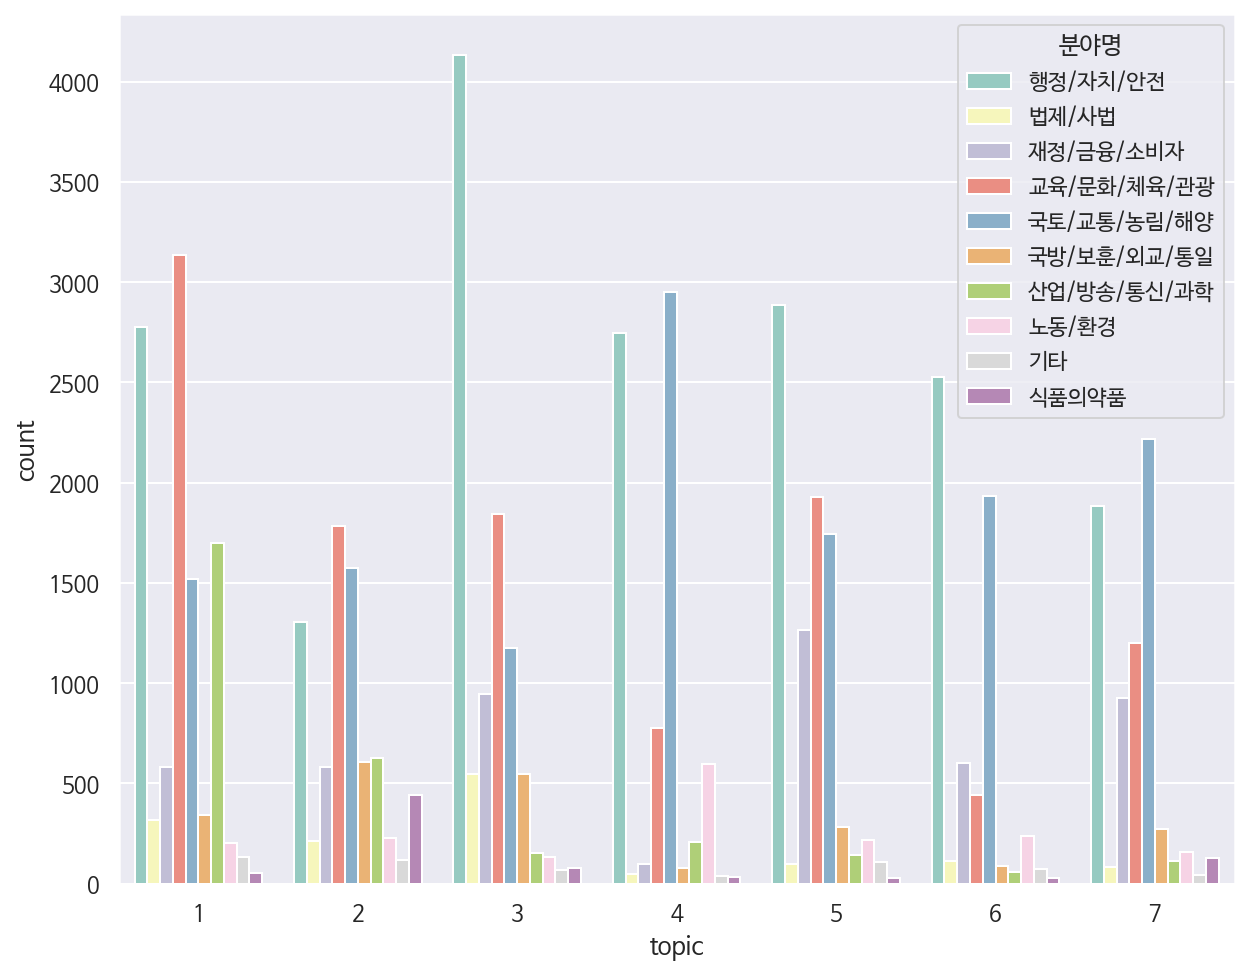

In [ ]:
fig, ax = plt.subplots()

sns.set(font="NanumBarunGothic",
        rc={"axes.unicode_minus":False, 'figure.figsize':(15,8)},
        style='darkgrid')

sns.countplot(x = 'topic', hue = '분야명', palette = 'Set3', data = data, ax=ax)

plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50556 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47749 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54665 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_

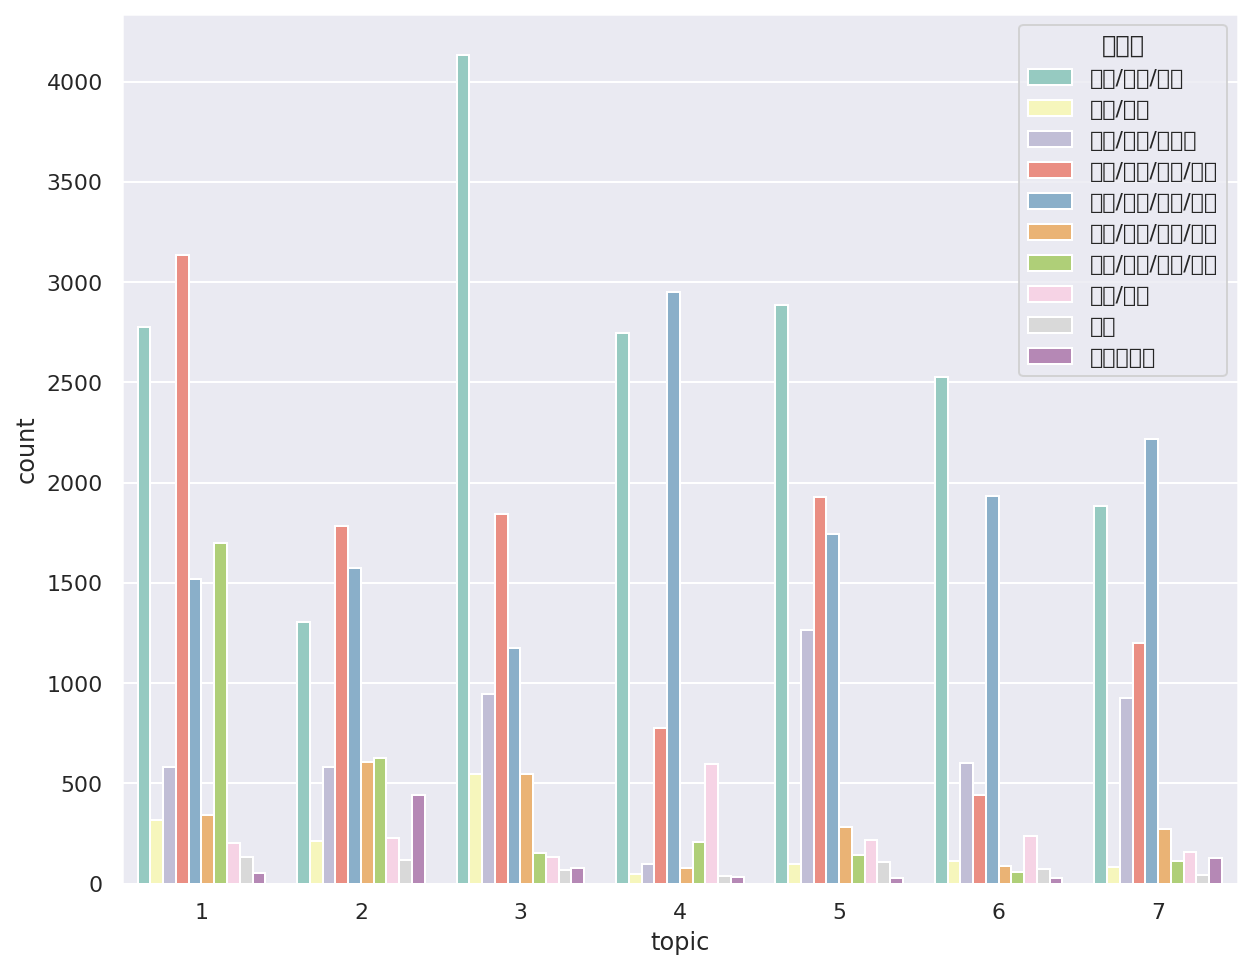

In [ ]:
fig, ax = plt.subplots()

sns.set(font="NanumBarunGothic",
        rc={"axes.unicode_minus":False, 'figure.figsize':(10,8)},
        style='darkgrid')

sns.countplot(x = 'topic', hue = '분야명', palette = 'Set3', data = data, ax=ax)

plt.show()

# 네트워크

In [ ]:
topic_0 = data[data['토픽'] == 0]
topic_0['토픽'].value_counts()

0    4703
Name: 토픽, dtype: int64

In [ ]:
pip install konlpy

In [ ]:
from konlpy.tag import Okt
import re

okt = Okt()

In [ ]:
#텍스트 데이터를 리스트로 변환
Data_list_0 = topic_0.질문내용.values.tolist()

#리스트를 요소별로(트윗 하나) 가져와서 명사만 추출한 후 리스트로 저장
tokens_0 = []
for i in range(len(Data_list_0)):
    try:
        token_0 = okt.nouns(Data_list_0[i])
        tokens_0.append(' '.join(token_0))
    except Exception as e:
        continue

print("명사 단위로 문장 분리")
print("----------------------")
print(tokens_0)

명사 단위로 문장 분리
----------------------
['아동 수당 지급 대상', '아동 수당 지급 금액 지급 일자', '양육 수당 지급 대상 지급 금액', '경상북도 의성군 면 리 장애인 전용 구역 불법 정차 신고', '어린왕자 카페 건너편 벤치 바닥 자칫 잘못 발 크게 확인', '강천산 길 맨홀 뚜껑 처리', '순창군 복흥면 월리 반사경 파손 및 사대 교통사고 위험 재 설치', '순창읍 학교 읍 사무소 아파트 학원 등 이용 위해 통행량 인도 가게 화분 비료 쓰레기 미관 뿐 더러 인도 반 이상 차지 통행 불편 위험 지도 정리', '전라북도 순창군 적성면 원리 불법 광고 물 처리', '인도 상황 아이 움찔 학교 학부모 입장 근처 주차장 널 불구 편의 때문 인도 정차 시설 설치 및 주차', '순창군 구림면 물이 설거지 거나 세수 등 생활 요즘 귀농 주변 집 더 더욱 심해 질 우려 지대 주민 수압', '순창군 순창읍 교 성리 쪽 도로 현상 보수', '강천산 립 공원 전북 도민 몇개 월 강천산 맨발 산책 구간 정비 자갈 물질 맨발 산책 매우 상태 간만 힐링 아이 모두 저 발 상처 난후 하산 또한 발 곳 물이 매우 입구 맨발 산책로 운영 물이 안내 문도 인 가족 입장료 모두 의 힐링 나들이 경험 코로나 백신 접종 률 점점 강천산 사람 산책로 정비 계획 발 곳 언제 이용 만약 당분간 정비 계획 매표소 입구 달 맨발 산책 목적 사람 알 조치', '순창군 순창읍 순화 리 번지 주변 도로 맨홀 뚜껑 보수 요청', '횡단보도 불법 정차 신고', '순창군 순창읍 일원 악취 나 물이 계속 물', '오토바이 양쪽 바디 부분 파란색 불법 등화 류 단 정황 발견 신고 확인 원상 복구 처분 등 조치', '유투브 순창 용궐산 하늘 길 소개 동영상 데크 길이 염려 민원 그 합판 재질 낭떠러지 데크 길 난간 지지 대가 생각 힘 년 걸 주변 영산강 주변 자전거 도로 강 주변 여러 곳 저 합판 재질 데크 길 조성 년도 여러 곳 바닥 길이 난간 지지 대가 걸 여러 번 낭떠러지 옆면 지지

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

count_vect_0 = CountVectorizer()
feat_vect_0 = count_vect_0.fit_transform(tokens_0)
print('CountVectorizer Shape : ', feat_vect_0.shape)

CountVectorizer Shape :  (4703, 7155)


In [ ]:
q_voca_0 = count_vect_0.vocabulary_
type(q_voca_0)

dict

In [ ]:
doc_0 = feat_vect_0.toarray()
doc_0

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
words_0 = count_vect_0.get_feature_names()
words_0

['가가',
 '가감',
 '가거초',
 '가게',
 '가격',
 '가공',
 '가공업',
 '가구',
 '가금',
 '가기',
 '가까이',
 '가끔',
 '가나',
 '가능',
 '가능동',
 '가능성',
 '가능역',
 '가다가',
 '가도',
 '가동',
 '가두리',
 '가드레일',
 '가득',
 '가라',
 '가락',
 '가락시장역',
 '가래침',
 '가렵',
 '가로',
 '가로등',
 '가로막',
 '가로무늬',
 '가로수',
 '가루',
 '가르침',
 '가름',
 '가리비',
 '가림',
 '가면',
 '가목',
 '가뭄',
 '가미',
 '가부',
 '가산',
 '가산금',
 '가산디지털단지역',
 '가상',
 '가설',
 '가속',
 '가스',
 '가스등',
 '가압류',
 '가액',
 '가야',
 '가오리',
 '가온',
 '가요',
 '가운데',
 '가을',
 '가이드',
 '가입',
 '가입자',
 '가자미',
 '가장',
 '가장자리',
 '가재',
 '가전',
 '가전제품',
 '가정',
 '가정위탁',
 '가정폭력',
 '가족',
 '가중',
 '가지',
 '가지치기',
 '가진동',
 '가치',
 '가택',
 '가파른',
 '가평군',
 '가해',
 '가해자',
 '가흥',
 '가흥동',
 '각각',
 '각도',
 '각성',
 '각심',
 '각자',
 '각장',
 '각종',
 '각통',
 '간격',
 '간만',
 '간반',
 '간병',
 '간섭',
 '간소화',
 '간의',
 '간이',
 '간접',
 '간주',
 '간주이자',
 '간직',
 '간척',
 '간척지',
 '간통죄',
 '간판',
 '간편',
 '간행물',
 '간호',
 '간혹',
 '갈고리',
 '갈기',
 '갈대',
 '갈라',
 '갈비',
 '갈색',
 '갈수',
 '갈치',
 '갈퀴덩굴',
 '갈현동',
 '감가상각',
 '감각',
 '감귤',
 '감기',
 '감나무',
 '감당',
 '감독',
 '감사',
 '감소',
 '감속',
 '감수',
 '감수성'

In [ ]:
word_count = list(zip(words_0, doc_0.flat))

In [ ]:
word_count

[('가가', 0),
 ('가감', 0),
 ('가거초', 0),
 ('가게', 0),
 ('가격', 0),
 ('가공', 0),
 ('가공업', 0),
 ('가구', 0),
 ('가금', 0),
 ('가기', 0),
 ('가까이', 0),
 ('가끔', 0),
 ('가나', 0),
 ('가능', 0),
 ('가능동', 0),
 ('가능성', 0),
 ('가능역', 0),
 ('가다가', 0),
 ('가도', 0),
 ('가동', 0),
 ('가두리', 0),
 ('가드레일', 0),
 ('가득', 0),
 ('가라', 0),
 ('가락', 0),
 ('가락시장역', 0),
 ('가래침', 0),
 ('가렵', 0),
 ('가로', 0),
 ('가로등', 0),
 ('가로막', 0),
 ('가로무늬', 0),
 ('가로수', 0),
 ('가루', 0),
 ('가르침', 0),
 ('가름', 0),
 ('가리비', 0),
 ('가림', 0),
 ('가면', 0),
 ('가목', 0),
 ('가뭄', 0),
 ('가미', 0),
 ('가부', 0),
 ('가산', 0),
 ('가산금', 0),
 ('가산디지털단지역', 0),
 ('가상', 0),
 ('가설', 0),
 ('가속', 0),
 ('가스', 0),
 ('가스등', 0),
 ('가압류', 0),
 ('가액', 0),
 ('가야', 0),
 ('가오리', 0),
 ('가온', 0),
 ('가요', 0),
 ('가운데', 0),
 ('가을', 0),
 ('가이드', 0),
 ('가입', 0),
 ('가입자', 0),
 ('가자미', 0),
 ('가장', 0),
 ('가장자리', 0),
 ('가재', 0),
 ('가전', 0),
 ('가전제품', 0),
 ('가정', 0),
 ('가정위탁', 0),
 ('가정폭력', 0),
 ('가족', 0),
 ('가중', 0),
 ('가지', 0),
 ('가지치기', 0),
 ('가진동', 0),
 ('가치', 0),
 ('가택', 0),
 ('가파른', 0),
 ('가평

In [ ]:
[w                          # (4) 단어들의 리스트
 for w, c                   # (2) 각 단어와 빈도 중에
 in zip(words_0, doc_0.flat)    # (1) 단어들과 빈도를 짝지운다.
 if c > 0]                  # (3) 빈도가 0보다 큰

['대상', '수당', '아동', '지급']

# 주제

In [ ]:
topic_8 = data[data['토픽'] == 8]
len(topic_8)

7190

In [ ]:
topic_8.head()

,제목,제목_nouns,질문내용,질문내용_nouns,답변내용,답변내용_nouns,최상위기관명,분야명,담당부서명,연,월,일,오전오후,시간,토픽
5,공공일자리 사업에 참여하고자 합니다,"[공공, 일자리, 사업, 참여]",공공일자리 사업에 참여하고자 합니다 공공일자리 사업은 어떻게 시행되나요,"[공공, 일자리, 사업, 참여, 공공, 일자리, 사업, 시행]",귀하께서 문의하신 공공일자리 사업의 주된 내용은 다음과 같습니다 사업개요 사업목적 ...,"[귀하, 문의, 공공, 일자리, 사업, 내용, 사업, 개요, 사업, 목적, 취약, ...",경상북도 의성군,행정/자치/안전,일자리창출과,2021,08,27,오후,4:50:31,8
12,의성군 노인일자리 사업 문의,"[의성군, 노인, 일자리, 사업, 문의]",의성군 노인일자리 신청자격 및 방법이 궁금합니다,"[의성군, 노인, 일자리, 신청, 자격, 방법]",안녕하십니까 귀하께서 문의하신 질의에 대한 답변을 다음과 같이 알려드립니다 귀하의 ...,"[안녕하십니까, 귀하, 문의, 질의, 대한, 답변, 귀하, 질의, 내용, 의성군, ...",경상북도 의성군,행정/자치/안전,복지과,2021,08,29,오후,8:25:00,8
19,노후경유차 조기폐차지원사업 안내 중 신차 보조금에 대한 문의,"[노후, 경유, 조기, 폐차, 원사, 안내, 신차, 보조금, 대한, 문의]",아버지가 의성군에 살고 계시는데 이번에 노후경유차 조기폐차 지원사업 추가대상자로 선...,"[아버지, 의성군, 계시, 노후, 경유, 조기, 폐차, 지원, 사업, 추가, 대상자...",귀하의 가정에 평안함과 행복을 기원합니다 국민신문고 접수번호 숫자 비식별 처리됨 숫...,"[귀하, 가정, 안함, 행복, 기원, 국민신문고, 접수, 번호, 숫자, 비식, 처리...",경상북도 의성군,행정/자치/안전,환경과,2021,08,30,오후,3:21:54,8
21,자활근로사업 대상 기준,"[자활, 근로, 사업, 대상]",자활사업에 참여하고 싶은데 어떤 대상자가 참여할수 있나요,"[자활, 사업, 참여, 대상자, 참여]",안녕하십니까 귀하께서 국민신문고를 통해 질의하신 내용에 대한 검토 결과를 다음과 같...,"[안녕하십니까, 귀하, 국민신문고, 통해, 질의, 내용, 대한, 검토, 귀하, 질의...",경상북도 의성군,행정/자치/안전,복지과,2021,08,30,오후,4:13:53,8
23,자산형성사업 지원기준,"[자산, 형성, 사업, 지원기]",자산형성지원사업 지원기준 및 내용에 대해 알고 싶습니다,"[자산, 형성, 원사, 지원기, 내용]",안녕하십니까 귀하께서 국민신문고를 통해 신청하신 질의에 대한 검토 결과를 다음과 같...,"[안녕하십니까, 귀하, 국민신문고, 통해, 신청, 질의, 대한, 검토, 귀하, 질의...",경상북도 의성군,행정/자치/안전,복지과,2021,08,30,오후,4:24:57,8


In [ ]:
topic_8 = topic_8.reset_index()

In [ ]:
jeju = []

for i in range(len(topic_8)):
  if ('제주' in topic_8['최상위기관명'][i]):
    jeju.append(i)

In [ ]:
jeju

[672,
 4520,
 4521,
 4522,
 4523,
 4524,
 4525,
 4526,
 4527,
 4528,
 4529,
 4530,
 4531,
 4532,
 4533,
 4534,
 4535,
 4536,
 4537,
 4538,
 4539,
 4540,
 4541,
 4542,
 4543,
 4544,
 4545,
 4546,
 4547,
 4548,
 4549,
 4550,
 4551,
 4552,
 4553,
 4554,
 4555,
 4556,
 4557,
 4558,
 4559,
 4560,
 4561,
 4562,
 4563,
 4564,
 4565,
 4566,
 4567,
 4568,
 4569,
 4570,
 4571,
 4572,
 4573,
 4574,
 4575,
 4576,
 4577,
 4578,
 4579,
 4580,
 4581,
 4582,
 4583,
 4584,
 4585,
 4586,
 4587,
 4588,
 4589,
 4590,
 4591,
 4592,
 4593,
 4594,
 4595,
 4596,
 4597,
 4598,
 4599,
 4600,
 4601,
 4602,
 4603,
 4604,
 4605,
 4606,
 6343,
 6393,
 6592,
 6593,
 6594,
 6643,
 6644,
 6895,
 6907,
 6908,
 6909,
 6910,
 6915,
 6916,
 6917,
 6925,
 6928,
 6929]

In [ ]:
topic_8_jeju = topic_8.loc[jeju]
topic_8_jeju = topic_8_jeju[['제목', '질문내용', '답변내용']]
topic_8_jeju.to_excel(excel_writer='/content/drive/Shareddrives/2021민원/데이터/topic_8_jeju.xlsx', index = False, header = False)

In [ ]:
gangwon = []

for i in range(len(topic_8)):
  if ('강원' in topic_8['최상위기관명'][i]):
    gangwon.append(i)

In [ ]:
gangwon

[156,
 2773,
 2774,
 2775,
 2776,
 2777,
 2778,
 2779,
 2780,
 2781,
 2782,
 2783,
 2784,
 2785,
 2786,
 2787,
 2788,
 2789,
 2790,
 2791,
 2792,
 2793,
 2794,
 2795,
 2796,
 2797,
 2798,
 2799,
 2800,
 2801,
 2802,
 2803,
 2804,
 2805,
 2806,
 2807,
 2808,
 2809,
 2810,
 2811,
 2812,
 2813,
 2814,
 2815,
 2816,
 2817,
 2818,
 2819,
 2820,
 2821,
 2822,
 2823,
 2824,
 2825,
 2826,
 2827,
 2828,
 2829,
 2830,
 2831,
 2832,
 2833,
 2834,
 2835,
 2836,
 2837,
 2838,
 2839,
 2840,
 2841,
 2842,
 2843,
 2844,
 2845,
 2846,
 2847,
 2848,
 2849,
 2850,
 2851,
 2852,
 2853,
 2854,
 2855,
 2856,
 2857,
 2858,
 2859,
 2860,
 2861,
 2862,
 2863,
 2864,
 2865,
 2866,
 2867,
 3826]

In [ ]:
topic_8_gangwon = topic_8.loc[gangwon]
topic_8_gangwon = topic_8_gangwon[['제목', '질문내용', '답변내용']]
topic_8_gangwon.to_excel(excel_writer='/content/drive/Shareddrives/2021민원/데이터/topic_8_gangwon.xlsx', index = False, header = True)

In [ ]:
gangwon = []

for i in range(len(topic_8)):
  if ('대전' in topic_8['최상위기관명'][i]):
    gangwon.append(i)

topic_8_gangwon = topic_8.loc[gangwon]
topic_8_gangwon = topic_8_gangwon[['제목', '질문내용', '답변내용', '최상위기관명']]
topic_8_gangwon.to_excel(excel_writer='/content/drive/Shareddrives/2021민원/데이터/topic_8_대전.xlsx', index = False, header = True)

In [ ]:
gangwon = []

for i in range(len(topic_8)):
  if ('대전' in topic_8['최상위기관명'][i]):
    gangwon.append(i)

topic_8_gangwon = topic_8.loc[gangwon]
topic_8_gangwon = topic_8_gangwon[['제목', '질문내용', '답변내용', '최상위기관명']]
topic_8_gangwon.to_excel(excel_writer='/content/drive/Shareddrives/2021민원/데이터/topic_8_대전.xlsx', index = False, header = True)

In [ ]:
['아르바이트', '알바'] in data['질문내용'][0]

TypeError: ignored

In [ ]:
alba = []

for i in range(len(data)):
  if ('보이스피싱' in data['질문내용'][i]):
    alba.append(i)

data_아르바이트 = data.loc[alba]
data_아르바이트 = data_아르바이트[['제목', '질문내용', '답변내용', '최상위기관명']]
#data_아르바이트.to_excel(excel_writer='/content/drive/Shareddrives/2021민원/데이터/data_소득신고.xlsx', index = False, header = True)

In [ ]:
data_아르바이트

,제목,질문내용,답변내용,최상위기관명
2897,보이스피싱전화 차단방법 문의 충남,보이스피싱전화 차단방법 문의,안녕하십니까 국민신문고를 방문하여 주셔서 감사합니다 보이스피싱 전화를 차단하는 방법...,경찰청
3078,보이스 피싱 전화번호 제보관련 문의 전남,보이스피싱 전화를 받았는데 전화번호를 제보하고 싶습니다 피해사실은 없고 단순 전화번...,보이스피싱 전화를 받았는데 전화번호를 제보하고 싶다 피해사실은 없고 단순 전화번호 ...,경찰청
3440,전화금융사기 보이스피싱 피해금 환급 광주,전화금융사기 보이스피싱 피해금 환급에 대해 문의드립니다,피해자의 구제신청으로 지급정지된 사기이용계좌에 인출되지 않고 남아있는 금액이 있는경...,경찰청
3535,보이스피싱 예방법 경기남부,보이스피싱 예방법,보이스피싱 발생 유형 및 예방 대처법을 간단히 안내해드리도록 하겠습니다 전화 금융사...,경찰청
3570,보이스피싱 피해 구제 방법 문의 경기남부,보이스피싱 범죄로 금전피해를 보았습니다 계죄이체로 이루어진 것이 아니라 지급정지 요...,안녕하십니까 문의하신 보이스피싱 피해 구제방법 안내 요청 민원내용에 대한 답변 드립...,경찰청
3577,금융결제원 사칭 아르바이트 모집 경기남부,아르바이트 모집 사이트에 이력서를 올린 것을 보고 금융결제원 인사채용 담당자라는 사...,경찰서 수사과입니다 문의하신 민원인이 아르바이트 모집 사이트에 이력서를 올린 것을 ...,경찰청
3599,보이스피싱 신고 경기남부,보이스피싱 신고,귀하의 민원은 보이스피싱 사기꾼들이 대출광고 금융기관을 사칭하여 계좌번호를 알아낼 ...,경찰청
3922,보이스피싱 의심 번호 제보합니다 경기북부,보이스피싱으로 의심되는 번호와 관련 내용을 캡처하여 신고합니다 처리 부탁드립니다,안녕하십니까 귀하께서 국민신문고를 통해 신청하신 민원에 대한 검토 결과를 다음과 같...,경찰청
4303,보이스피싱 의심 전화 신고 절차 문의 전남,보이스피싱 의심 전화 신고 절차 문의,안녕하세요 전라남도경찰청 완도경찰서 청문감사인권관입니다 먼저 국민신문고를 방문해주셔...,경찰청
5670,보이스피싱으로 개인정보가 유출된 경우 주민번호를 바꿀수 있는지,보이스피싱으로 개인정보가 유출된 경우 주민번호를 바꿀수 있나요,유출된 주민등록번호로 인하여 생명 신체에 위해 재산에 피해를 입거나 입을 우려가 있...,전라북도 남원시


In [ ]:
sorted_dict0 = sorted(q_voca.items(), key = lambda item: item[1], reverse = True)
print(sorted_dict0)

[('힐스테이트', 7154), ('힐스', 7153), ('힐링', 7152), ('힐데스하임', 7151), ('힌트', 7150), ('흰색', 7149), ('희화', 7148), ('희망', 7147), ('흥덕', 7146), ('흡착', 7145), ('흡입', 7144), ('흡연실', 7143), ('흡연', 7142), ('흡수', 7141), ('흙탕물', 7140), ('흘수', 7139), ('흑석동', 7138), ('흐름', 7137), ('흉터', 7136), ('흉물', 7135), ('흉내내', 7134), ('흉기', 7133), ('휴천동', 7132), ('휴직', 7131), ('휴지통', 7130), ('휴지', 7129), ('휴일', 7128), ('휴업', 7127), ('휴양', 7126), ('휴식', 7125), ('휴무', 7124), ('휴면', 7123), ('휴먼', 7122), ('휴대폰', 7121), ('휴대전화', 7120), ('휴게실', 7119), ('휴게소', 7118), ('휴게', 7117), ('휴강', 7116), ('휴가', 7115), ('휠체어', 7114), ('휀스', 7113), ('훼손', 7112), ('훈수', 7111), ('훈방', 7110), ('훈련', 7109), ('후진국', 7108), ('후진', 7107), ('후직', 7106), ('후지', 7105), ('후유증', 7104), ('후원', 7103), ('후시', 7102), ('후송', 7101), ('후손', 7100), ('후속', 7099), ('후부', 7098), ('후보', 7097), ('후배', 7096), ('후방', 7095), ('후문', 7094), ('후면', 7093), ('후드', 7092), ('효율', 7091), ('효소', 7090), ('효력', 7089), ('효도', 7088), ('효능', 7087), ('효과', 7086), ('횡단보도', 7085

In [ ]:
feat_vect0.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
t0 = topic0[['질문내용_nouns', '답변내용_nouns']]
t0.head()

,질문내용_nouns,답변내용_nouns
2,"[아동, 수당, 지급, 대상]","[안녕하십니까, 귀하, 문의, 질의, 대한, 답변, 귀하, 질의, 내용, 아동, 수..."
4,"[아동, 수당, 지급, 금액, 지급, 일자]","[안녕하십니까, 귀하, 문의, 질의, 대한, 답변, 귀하, 질의, 내용, 아동, 수..."
6,"[양육, 수당, 지급, 대상, 지급, 금액]","[안녕하십니까, 귀하, 문의, 질의, 대한, 답변, 귀하, 질의, 내용, 양육, 수..."
16,"[경상북도, 의성군, 장애인, 전용, 구역, 불법, 주정, 신고]","[평소, 장애인, 복지, 행정, 관심, 감사, 장애인, 노인, 임산부, 편의, 증진..."
37,"[카페, 건너편, 벤치, 바닥, 자칫, 잘못, 크게, 수도, 확인]","[귀하, 가정, 행복, 평안, 가득, 기원, 순창군, 순창읍, 산책로, 데크, 파손..."


In [ ]:
t0.to_excel(excel_writer='/content/drive/Shareddrives/2021민원/데이터/topic0_gephi.xlsx', index = False, header = False)

In [ ]:
data['토픽'].value_counts()

5    8156
1    7779
8    7190
2    7040
9    5061
7    5061
3    4948
0    4703
6    3876
4    3435
Name: 토픽, dtype: int64

In [ ]:
topic_0 = data[data['토픽'] == 0]
topic_0['담당부서명'].value_counts()

고객지원담당관    197
운영지원과      155
청문감사인권관    150
노인장애인과     124
.          110
          ... 
항만물류기획과      1
어선안전정책과      1
연구산업진흥과      1
서울센터         1
행복돌봄과        1
Name: 담당부서명, Length: 555, dtype: int64

In [ ]:
topic_0.head(50)

,제목,제목_nouns,질문내용,질문내용_nouns,답변내용,답변내용_nouns,최상위기관명,분야명,담당부서명,연,월,일,오전오후,시간,토픽
2,아동수당 지급 대상,"[아동, 수당, 지급, 대상]",아동수당 지급 대상이 궁금합니다,"[아동, 수당, 지급, 대상]",안녕하십니까 귀하께서 문의하신 질의에 대한 답변을 다음과 같이 알려드립니다 귀하의 ...,"[안녕하십니까, 귀하, 문의, 질의, 대한, 답변, 귀하, 질의, 내용, 아동, 수...",경상북도 의성군,행정/자치/안전,복지과,2021,08,27,오후,4:19:51,0
4,아동수당 지급 금액과 지급 일자,"[아동, 수당, 지급, 금액, 지급, 일자]",아동수당 지급 금액과 지급 일자가 궁금합니다,"[아동, 수당, 지급, 금액, 지급, 일자]",안녕하십니까 귀하께서 문의하신 질의에 대한 답변을 다음과 같이 알려드립니다 귀하의 ...,"[안녕하십니까, 귀하, 문의, 질의, 대한, 답변, 귀하, 질의, 내용, 아동, 수...",경상북도 의성군,행정/자치/안전,복지과,2021,08,27,오후,4:24:24,0
6,양육수당 지급 대상과 지급 금액,"[양육, 수당, 지급, 대상, 지급, 금액]",양육수당 지급 대상과 지급 금액이 궁금합니다,"[양육, 수당, 지급, 대상, 지급, 금액]",안녕하십니까 귀하께서 문의하신 질의에 대한 답변을 다음과 같이 알려드립니다 귀하의 ...,"[안녕하십니까, 귀하, 문의, 질의, 대한, 답변, 귀하, 질의, 내용, 양육, 수...",경상북도 의성군,행정/자치/안전,복지과,2021,08,27,오후,5:10:27,0
16,장애인 전용구역 불법주차 불법 주정차 신고입니다,"[장애인, 전용, 구역, 불법, 주차, 불법, 주정, 신고]",경상북도 의성군 면 리 장애인 전용구역 불법주정차 신고입니다,"[경상북도, 의성군, 장애인, 전용, 구역, 불법, 주정, 신고]",평소 장애인복지행정에 관심을 가져주셔서 감사드립니다 장애인노인임산부등의편의증진보장에...,"[평소, 장애인, 복지, 행정, 관심, 감사, 장애인, 노인, 임산부, 편의, 증진...",경상북도 의성군,행정/자치/안전,복지과,2021,08,30,오후,12:58:19,0
37,계천쪽 산책로 바닥이 위험합니다,"[산책로, 바닥, 위험]",어린왕자카페 건너편에 벤치 있는데 바닥이 망가졌네요 자칫 잘못하다가는 발이 빠지거나...,"[카페, 건너편, 벤치, 바닥, 자칫, 잘못, 크게, 수도, 확인]",귀하의 가정에 행복과 평안이 가득하길 기원합니다 순창군 순창읍 교성리 산책로에 데크...,"[귀하, 가정, 행복, 평안, 가득, 기원, 순창군, 순창읍, 산책로, 데크, 파손...",전라북도 순창군,행정/자치/안전,민원과,2021,04,19,오전,11:23:54,0
38,강천산가는 길에 맨홀뚜껑이 뒤집혀 있으니 조치 부탁합니다,"[강천산, 맨홀, 뚜껑, 조치, 부탁]",강천산가는 길에 맨홀뚜껑이 뒤집혀 있어서 덮어놨습니다 처리해주세요,"[강천산, 맨홀, 뚜껑, 처리, 해주]",가 귀하의 가정에 행복이 가득하시길 기원합니다 나 도로 이용에 불편을 드려 죄송합니...,"[귀하, 가정, 행복, 가득, 기원, 불편, 죄송, 현지, 확인, 현재, 임시, 보...",전라북도 순창군,행정/자치/안전,민원과,2021,04,20,오전,11:43:07,0
40,반사경 파손 및 반사대가 부러져서 교통사고 위험이 있으니 조치부탁드립니다,"[반사경, 파손, 반사, 대가, 부러, 교통사고, 위험, 조치, 부탁]",순창군 복흥면 반월리에 반사경 파손 및 반사대 부러져서 교통사고 위험이 있습니다 재...,"[순창군, 반사경, 파손, 반사, 부러, 교통사고, 위험, 설치]",가 귀하의 가정에 행복이 가득하시길 기원합니다 나 복흥면 반월리 반사경 파손은 현장...,"[귀하, 가정, 행복, 가득, 기원, 반사경, 파손, 현장, 확인, 시일, 설치, ...",전라북도 순창군,행정/자치/안전,민원과,2021,04,20,오전,11:44:36,0
41,인도의 적치물로 인해 통행 불편과 위험이 있으니 정리해주세요,"[인도, 통행, 불편, 위험, 정리, 해주]",순창읍 남계리oo 학교 읍사무소와 아파트와 학원 등을 이용하기 위해 통행량이 많은 ...,"[순창읍, 학교, 사무소, 아파트, 학원, 통행, 인도, 가게, 화분, 비료, 쓰레...",가 귀하의 가정에 행복이 가득하시길 기원합니다 나 인도에 통행방해요소 제거를 위한 ...,"[귀하, 가정, 행복, 가득, 기원, 인도, 통행, 방해, 제거, 현장, 점검, 통...",전라북도 순창군,행정/자치/안전,민원과,2021,04,20,오전,11:45:19,0
42,불법광고물 처리,"[불법, 광고, 처리]",전라북도 순창군 적성면 고원리 불법광고물 처리 부탁드립니다,"[전라북도, 순창군, 고원, 불법, 광고, 처리, 부탁]",귀하의 가정에 행복과 평안이 가득하시길 기원합니다 적성면 고원리 불법 옥외광고물에 ...,"[귀하, 가정, 행복, 평안, 가득, 기원, 고원, 불법, 옥외광고, 현장, 확인,...",전라북도 순창군,행정/자치/안전,민원과,2021,04,20,오전,11:46:29,0
50,인도 위 주차 금지,"[인도, 주차, 금지]",차가 인도를 달리는 상황에서 아이가 움찔했습니다 학교를 보내고 있는 학부모 입장에서...,"[인도, 달리, 상황, 학교, 학부모, 불안, 근처, 공영, 주차장, 비어, 편의,...",안녕하십니까 귀하의 가정이 늘 행복하시길 기원합니다 귀하께서 문의하신 중앙초 후문 ...,"[안녕하십니까, 귀하, 가정, 행복, 기원, 귀하, 문의, 중앙, 후문, 건너편, ...",전라북도 순창군,행정/자치/안전,민원과,2021,07,23,오후,12:54:37,0


In [ ]:
topic_1 = data[data['토픽'] == 1]
topic_1['담당부서명'].value_counts()

행정법무담당관      592
납세자보호담당관     565
.            422
운영지원과        342
규제개혁법무담당관    302
            ... 
민락동            1
조사담당관          1
수성사업소          1
정보자료과          1
건설행정과          1
Name: 담당부서명, Length: 751, dtype: int64